In [1]:
import numpy as np
import SimpleITK as sitk
import os
import matplotlib.pyplot as plt

In [2]:
ct_path='/Users/amograo/Research_Projects/DL_HIE_2024/data_dir/BONBID2023_Train/1ADC_ss/MGHNICU_010-VISIT_01-ADC_ss.mha'
ct_label_path='/Users/amograo/Research_Projects/DL_HIE_2024/data_dir/BONBID2023_Train/3LABEL/MGHNICU_010-VISIT_01_lesion.mha'

# CT
img_sitk  = sitk.ReadImage(ct_path, sitk.sitkFloat32) # Reading CT
image     = sitk.GetArrayFromImage(img_sitk) #Converting sitk_metadata to image Array
# Mask
mask_sitk = sitk.ReadImage(ct_label_path,sitk.sitkInt32) # Reading CT
mask      = sitk.GetArrayFromImage(mask_sitk)

Original Spacing: (1.5625, 1.5625, 4.0)
Original Size: (128, 128, 23)
CT Shape Original=(23, 128, 128), Resampled to 1mm=(64, 128, 128)


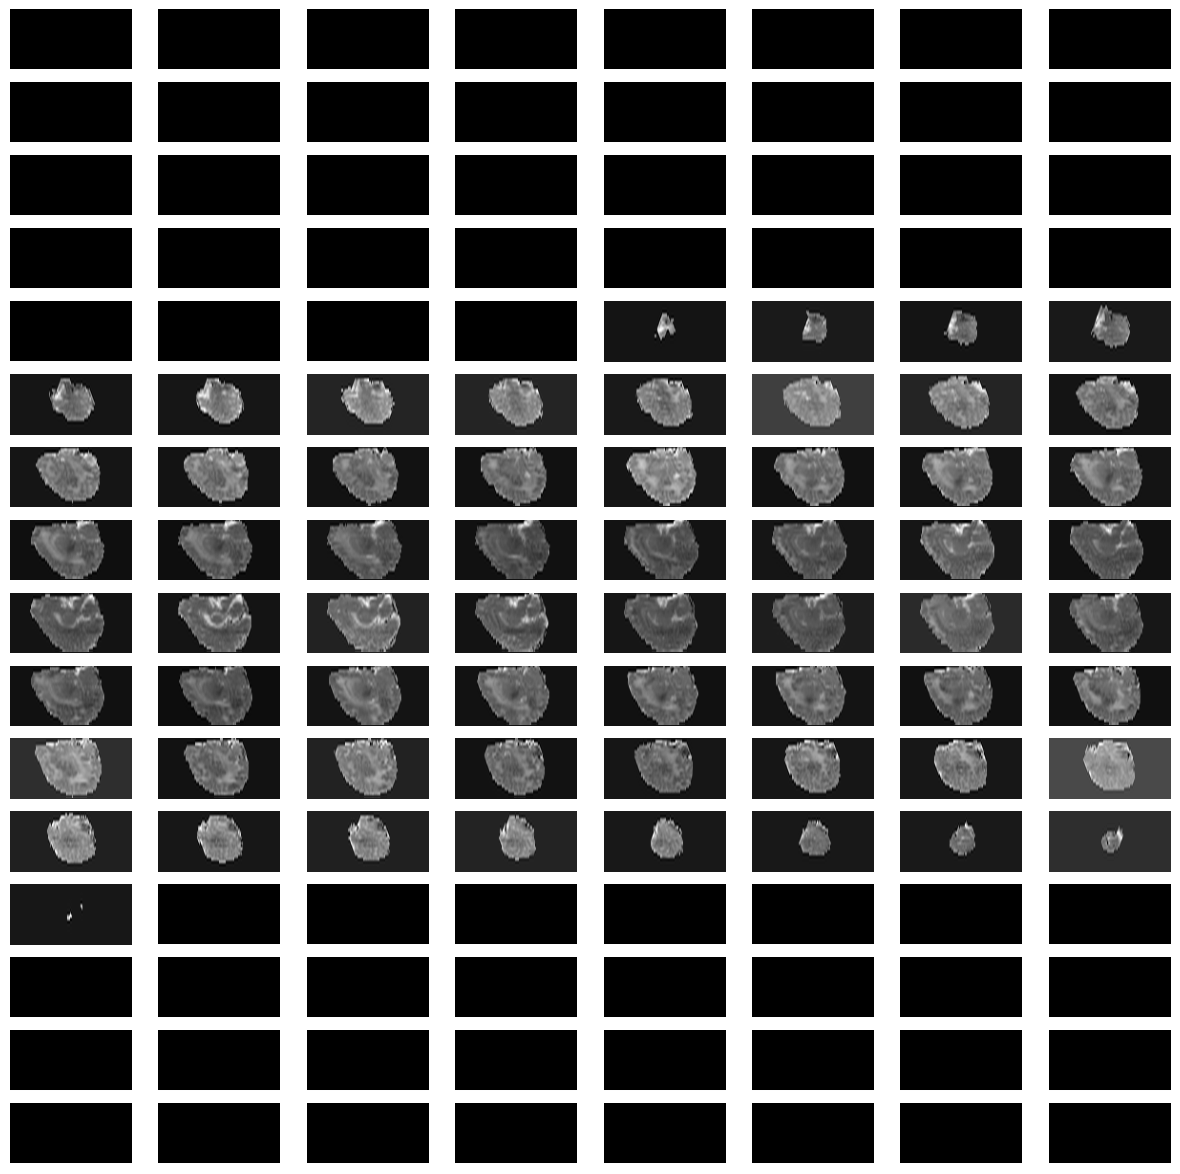

In [25]:
def resample_img(itk_image, out_spacing=[2.0, 2.0, 2.0], is_label=False):
    # resample images to 2mm spacing with simple itk

    original_spacing = itk_image.GetSpacing()
    print('Original Spacing:',original_spacing)
    original_size = itk_image.GetSize()
    print('Original Size:',original_size)

    out_size = [
        int(np.round(original_size[0] * (original_spacing[0] / out_spacing[0]))),
        int(np.round(original_size[1] * (original_spacing[1] / out_spacing[1]))),
        int(np.round(original_size[2] * (original_spacing[2] / out_spacing[2])))]

    resample = sitk.ResampleImageFilter()
    resample.SetOutputSpacing(out_spacing)
    resample.SetSize(out_size)
    resample.SetOutputDirection(itk_image.GetDirection())
    resample.SetOutputOrigin(itk_image.GetOrigin())
    resample.SetTransform(sitk.Transform())
    resample.SetDefaultPixelValue(itk_image.GetPixelIDValue())

    if is_label:
        resample.SetInterpolator(sitk.sitkNearestNeighbor)
    else:
        resample.SetInterpolator(sitk.sitkBSpline)

    return resample.Execute(itk_image)


ct_resampled_to1m=resample_img(img_sitk, out_spacing=[1.5625, 1.5625, 1.4375], is_label=False)
ct_resampled_to1m=sitk.GetArrayFromImage(ct_resampled_to1m)

print('CT Shape Original={}, Resampled to 1mm={}'.format(image.shape,ct_resampled_to1m.shape))

# show all the 64 axial slices (8 columns, 8 rows)
# fig, ax = plt.subplots(8, 8, figsize=[15, 15])
# for i in range(64):
#     ax[int(i / 8), int(i % 8)].imshow(ct_resampled_to1m[i, :, :], cmap='gray')
#     ax[int(i / 8), int(i % 8)].axis('off')
# plt.show()

# now show all 128 coronal slices (16 rows, 8 columns)
fig, ax = plt.subplots(16, 8, figsize=[15, 15])
for i in range(128):
    ax[int(i / 8), int(i % 8)].imshow(ct_resampled_to1m[:, :, i], cmap='gray')
    ax[int(i / 8), int(i % 8)].axis('off')

Original Spacing: (1.5625, 1.5625, 4.0)
Original Size: (128, 128, 23)
Original Spacing: (1.5625, 1.5625, 4.0)
Original Size: (128, 128, 23)
CT Shape Original=(23, 128, 128), Resampled to 1mm=(64, 128, 128)
CT Mask Shape=(23, 128, 128), Resampled to 1mm=(64, 128, 128)


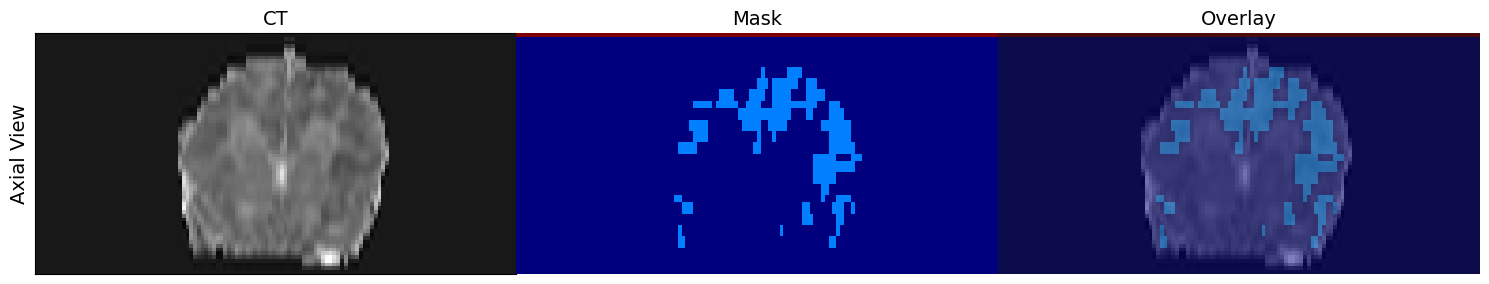

In [22]:
def resample_img(itk_image, out_spacing=[2.0, 2.0, 2.0], is_label=False):
    # resample images to 2mm spacing with simple itk

    original_spacing = itk_image.GetSpacing()
    print('Original Spacing:',original_spacing)
    original_size = itk_image.GetSize()
    print('Original Size:',original_size)

    out_size = [
        int(np.round(original_size[0] * (original_spacing[0] / out_spacing[0]))),
        int(np.round(original_size[1] * (original_spacing[1] / out_spacing[1]))),
        int(np.round(original_size[2] * (original_spacing[2] / out_spacing[2])))]

    resample = sitk.ResampleImageFilter()
    resample.SetOutputSpacing(out_spacing)
    resample.SetSize(out_size)
    resample.SetOutputDirection(itk_image.GetDirection())
    resample.SetOutputOrigin(itk_image.GetOrigin())
    resample.SetTransform(sitk.Transform())
    resample.SetDefaultPixelValue(itk_image.GetPixelIDValue())

    if is_label:
        resample.SetInterpolator(sitk.sitkNearestNeighbor)
    else:
        resample.SetInterpolator(sitk.sitkBSpline)

    return resample.Execute(itk_image)


ct_resampled_to1m=resample_img(img_sitk, out_spacing=[1.5625, 1.5625, 1.4375], is_label=False)
ct_resampled_to1m=sitk.GetArrayFromImage(ct_resampled_to1m)
mask_resampled_to1m=resample_img(mask_sitk, out_spacing=[1.5625, 1.5625, 1.4375], is_label=True)
mask_resampled_to1m=sitk.GetArrayFromImage(mask_resampled_to1m)
print('CT Shape Original={}, Resampled to 1mm={}'.format(image.shape,ct_resampled_to1m.shape))
print('CT Mask Shape={}, Resampled to 1mm={}'.format(mask.shape,mask_resampled_to1m.shape))

slicee = 50
#----Lets plot 
f, axarr = plt.subplots(1,3,figsize=(15,15))
axarr[0].imshow(np.squeeze(ct_resampled_to1m[:, slicee, :]), cmap='gray',origin='lower')
axarr[0].set_ylabel('Axial View',fontsize=14)
axarr[0].set_xticks([])
axarr[0].set_yticks([])
axarr[0].set_title('CT',fontsize=14)

axarr[1].imshow(np.squeeze(mask_resampled_to1m[:, slicee, :]), cmap='jet',origin='lower')
axarr[1].axis('off')
axarr[1].set_title('Mask',fontsize=14)

axarr[2].imshow(np.squeeze(ct_resampled_to1m[:, slicee, :]), cmap='gray',alpha=1,origin='lower')
axarr[2].imshow(np.squeeze(mask_resampled_to1m[:, slicee, :]),cmap='jet',alpha=0.5,origin='lower')
axarr[2].axis('off')
axarr[2].set_title('Overlay',fontsize=14)
plt.tight_layout()
plt.subplots_adjust(wspace=0, hspace=0)